## CIFO Selection Analysis_1

Let's try to make use of the logger.

Idea -> Load Data into Frame and compute statistics and graphs

In [21]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [22]:
headers = ["iteration", "elite.fitness", "elite.validation_fitness", "population_size", "selection_method", "crossover_method", "crossover_rate",
                             "mutation_method", "None", "None", "mutation_rate", "phenotypic_diversity_shift"]

Pressure: 0.1
Radius: 1

In [39]:
#loading CSV of CIFO data
selection_1 = pd.read_csv("Selection_Analysis_1.csv",
                             sep= ",",
                             header = None,
                             names = headers)

selection_2 = pd.read_csv("Selection_Analysis_2.csv",
                             sep= ",",
                             header = None,
                             names = headers)

#drop wrong rank selection
selection_1 = selection_1.loc[selection_1["selection_method"] != "best_rank_selection",:]

#concat both df
selection = pd.concat([selection_1, selection_2])

selection["Radius"] = 1
selection["Pressure"] = 0.1
#selection["elite.fitness"] = selection["elite.fitness"].str.strip()
#selection["elite.fitness"] = selection["elite.fitness"].apply(pd.to_numeric)
selection = selection.reset_index(drop=True)
selection = selection.drop(["None", "None.1"], axis=1)

In [43]:
selection.describe()

iteration  elite.fitness  elite.validation_fitness  population_size  \
count  3000.000000    3000.000000               3000.000000           3000.0   
mean     49.500000       0.291357                  0.279570             50.0   
std      28.870882       0.063410                  0.061748              0.0   
min       0.000000       0.148649                  0.116183             50.0   
25%      24.750000       0.244283                  0.232365             50.0   
50%      49.500000       0.278586                  0.278008             50.0   
75%      74.250000       0.328482                  0.319502             50.0   
max      99.000000       0.456341                  0.460581             50.0   

       crossover_rate  mutation_rate  phenotypic_diversity_shift  Radius  \
count    3.000000e+03    3000.000000                 3000.000000  3000.0   
mean     1.000000e-01       0.926667                    0.000184     1.0   
std      9.716071e-17       0.037719                    0.010526     0.0   
min      1.000000e-01       0.900000                   -0.059661     1.0   
25%      1.000000e-01       0.900000                   -0.003988     1.0   
50%      1.000000e-01       0.900000                    0.000054     1.0   
75%      1.000000e-01       0.980000                    0.004433     1.0   
max      1.000000e-01       0.980000                    0.063327     1.0   

           Pressure  
count  3.000000e+03  
mean   1.000000e-01  
std    9.716071e-17  
min    1.000000e-01  
25%    1.000000e-01  
50%    1.000000e-01  
75%    1.000000e-01  
max    1.000000e-01

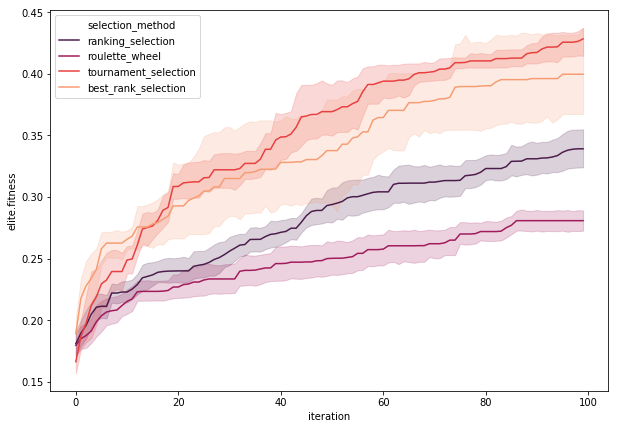

In [42]:
plt.subplots(figsize=(10,7))
sns.lineplot(x="iteration",
             y="elite.fitness",
             hue="selection_method",
             data=selection,
            palette= "rocket",
            err_style="band",
            legend="full")

Next Step:

- fix boltzman
- run with boltzman tournament
- include in results